# CAPSTONE 3 : BANK MARKETING CAMPAIGN

## 1. Business Problem Understanding

## 1.1 CONTEXT
setiap jangka waktu tertentu Perusahaan Perbankan Portugies melakukan kampanye pemasaran deposito berjangka. kampanye pemasaran dilakukan melalului panggilan telepon langsung. dari data kampanye pemasaran sebelumnya, perusahaan ingin mengetahui customer mana yang berpotensi akan mengambil program deposito berjangka, sehingga perusahaan dapat menentukan customer mana saja yang akan ditelepon.

## 1.2 PROBLEM STATEMENT
Terkait dengan banyaknya masalah-masalah global yang terjadi, salah satu yang terkena imbasnya ialah di bidang/sektor perbankan. selama pandemi Perusahaan Perusahaan yang bergerak di sektor perbankan mengalami penurunan profitabilitas industri. maka dari itu, perusahaan-perusahaan perbankan perlu selalu melakukan strategi-strategi tertentu agar perusahaan dapat selalu berjalan. salah satu strategi yang dilakukan ialah pengoptimalan strategi pemasaran dan meningkatkan/menambah profit sebanyaknya. saat ini, pengeluaran pemasaran di industri perbankan sangat besar, yang berarti penting bagi perusahaan perbankan untuk mengoptimalkan strategi pemasaran dan meningkatkan/menambah profit sebanyaknya. salah satu cara untuk melakukan optimalisasi strategi pemasaran ialah dengan cara memilih calon target kampanye pemasaran yang memang berpotensi akan mengambil kampanye, sehingga badget untuk melakukan pemasaran tidak teresap kepada customer yang memang tidak berpotensi akan mengambil kampanye. selain melakukan optimalisasi pemasaran, perusahaan ingin juga memaksimalkan seluruh profit yang bisa didapat, dengan cara memastikan seluruh customer yang memang berpotensi akan mengambil kampanye pemasaran tidak terlewat di tawarkan kampanye pemasaran, sehingga perusahaan dapat memaksimalkan profit yang bisa diterima dari customer yang akan memakai kampanye. seluruh badget hasil dari menghemat strategi pemasaran dan pemaksimalan profit yang bisa diterima dapat digunakan untuk lebih meyakinkan customer yang memang berpotensi tapi masih ragu dan juga dapat dipakai perusahaan untuk menjalankan strategi-strategi bisnis lainnya.
    
## 1.3 GOALS
dengan Machine Learning kita dapat memprediksi customer mana saja yang akan berpotensi mengambil kampanye dan customer mana yang tidak akan mengambil kampanye. dari hasil yang didapatkan, kita dapat menghemat biaya/badget pemasaran dan waktu dari telemarketing terhadap customer yang memang tidak perlu kita tawarkan kampanye pemasaran, selain itu dengan tidak melewatkan customer yang memang berpotensi akan mengambil kampanye juga, pada akhirnya akan meningkatkan profitabilitas dari perusahaan. 

## 1.4 ANALYTIC APPROACH
dari feature-feature yang telah dipilih nanti, kita akan membuat model klafikasi untuk memprediksi customer mana yang berpotensi akan mengambil kampanye pemasaran dan customer mana yang tidak akan mengambil kampanye pemasaran.

## 1.5 EVALUASI MATRICS

target:<br>
1 : customer yang berpotensi mengambil program deposito berjangka<br>
0 : customer yang tidak berpotensi mengambil program deposito berjangka

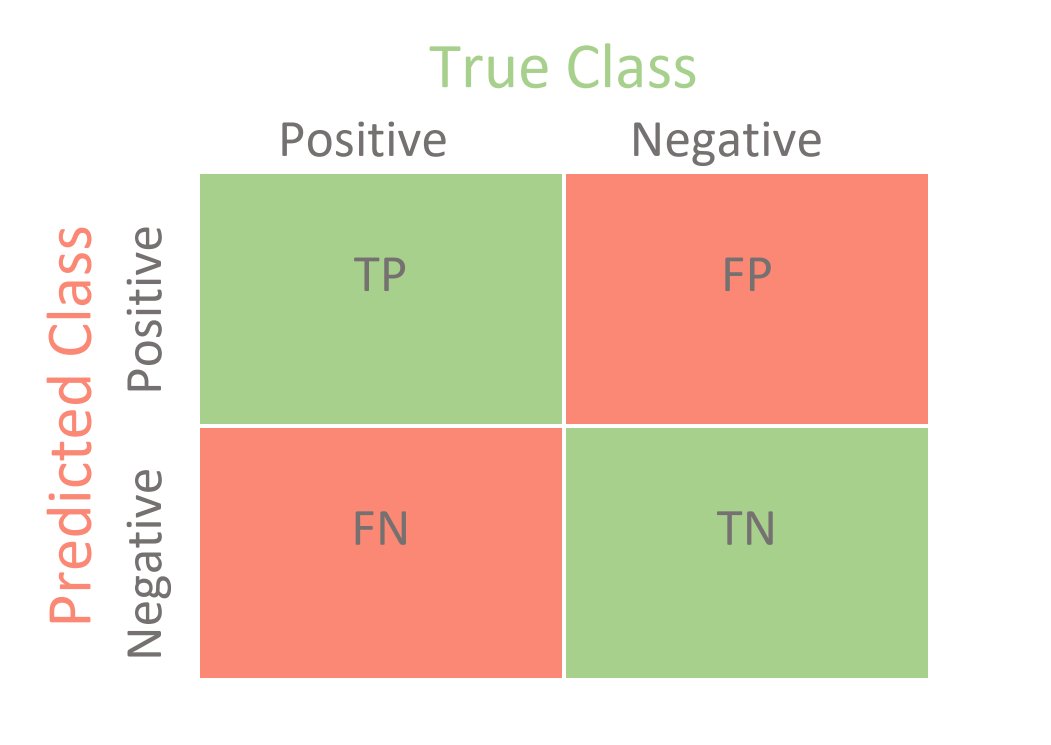

TP = dapat memprediksi customer yang berpotensi mengambil kampanye pemasaran <br>
TN = dapat memprediksi customer yang tidak akan mengambil kampanye pemasaran <br>
FP = salah memprediksi customer yang berpotensi, sebenarnya tidak akan mengambil kampanye pemasaran => kons= kita jadi perlu mengeluarkan biaya dan waktu yang lebih kepada customer yang sebenarnya tidak akan mengambil kampanye pemasaran <br>
FN = salah memprediksi customer yang tidak akan mengambil, sebenarnya berpotensi akan mengambil kampanye pemasaran => kita jadi kehilangan calon customer yang berpotensi akan mengambil kampanye pemasaran(kehilangan calon profit)

seperti problem statement yang telah dijelaskan sebelumnya, saat ini kita diminta tim pemasaran untuk dapat mengurangi biaya kampanye pemasaran terbaru dan sebisa mungkin menaikan profitabilitas dari perusahaan, maka dari konsekuensi yang telah diberikan, saat ini kita ingin fokus pada FP(False Positif) dan FN(False NEGATIF) agar memastikan prediksi yang seharusnya kita telpon memang kostumer yang memang berpotensi akan mengambil kampanye dan meninggalkan customer yang memang tidak berpotensi mengambil kampanye, dan apabila data nanti diketahui bahwa data yang didapat merupakan data imbalance, evaluasi metrics f1 juga dapat digunakan. evaluasi matrics yang akan dipilih ialah evaluasi matrics yang memiliki nilai F1 tertinggi. f1(P) sendiri tertarik hanya pada kelas positif saja, rumus f1 sendiri ialah:

                            F1 = 2x(Precision X Recall)/(precision + Recall)

## 2. DATA UNDERSTANDING AND CLEANING

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, plot_precision_recall_curve, average_precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
import pickle

## 2.1 Explore Data 

In [2]:
# mengecek 5 data awal dataframe
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


didapatkan bahwa dataframe 'data_bank_marketing_campaign.csv' memiliki beberapa kolom seperti:
1. age       : menunjukan umur customer
2. job       : menunjukan pekerjaan customer
3. balance   : menunjukan total tabungan customer (balance minus diasumsikan ada melakukan peminjaman)
4. housing   : menunjukan customer memiliki rumah atau tidak
5. loan      : menunjukan apakah punya hutang pribadi atau tidak
6. contact   : tipe alat komunikasi
7. month     : bulan terahir di kontak
8. campaign  : sudah berapa kali di kontak dalam periode kampanye pemasaran sekarang
9. pdays     : jumlah hari setelah terahir dikontak di kampanye sebelumnya (-1 tidak di kotak di periode kampanye pemasaran sebelumnya)
10. poutcame : menunjukan status dari kampanye sebelumnya
11. deposit  : menunjukan apakah melakukan deposit atau tidak

In [3]:
# mengecek jumlah baris dan kolom pada dataframe
df.shape

(7813, 11)

dataframe awal memiliki 7813 baris dan 11 kolom, dari 11 kolom setelah dilakukan analisis memiliki hubungan terhadap target, maka 11 kolom akan digunakan semua dalam pemodelan

In [4]:
#mengecek sekilas info dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


dapat dilihat hanya kolom age, balance, campaign, pdays yang sudah bertipe data numerik, maka kolom yang lainnya perlu dilakukan preprocessing agar menjadi tipe numerik dan bisa masuk ke pemodelan.

## 2.2 CEK MISSING VALUE

In [5]:
# mengecek missing value pada kolom
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

dapat dilihat bahwa dataframe tidak memiliki missing value

## 2.3 CEK DATA DUPLIKAT

In [6]:
#cek data duplikat
df.duplicated().sum()

8

terdapat 8 data duplikat, kita akan langsung hapus saja data duplikat

In [7]:
#menghapus data duplikat
df.drop_duplicates(inplace=True)

In [8]:
# mengecek data outliers melalui describe
df.describe()

,age,balance,campaign,pdays
count,7805.000000,7805.000000,7805.000000,7805.000000
mean,41.257783,1513.968225,2.520564,51.462268
std,11.922833,3090.508938,2.728204,108.115084
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,128.000000,1.000000,-1.000000
50%,39.000000,550.000000,2.000000,-1.000000
75%,49.000000,1685.000000,3.000000,41.000000
max,95.000000,66653.000000,63.000000,854.000000


dapat dilihat, pada kolom age, balance, campaign, dan pdays terdapat data outlier, tetapi akan tetap dimasukkan ke dalam pemodelan karna masih sesuai dengan fakta yang mungkin saja terjadi dilapangan.

## 2.4 UNDERSTANDING BEBERAPA KOLOM

In [9]:
#melihat data unique di setiap kolom
pd.set_option('display.max_colwidth', None)
features=[]
unique=[]
nunique=[]
miss_sum=[]

for i in df.columns:
    features.append(i)
    unique.append(df.sort_values(i)[i].unique())
    nunique.append(df[i].nunique())
    miss_sum.append(df[i].isna().sum())

pd.DataFrame({'features':features,
            'unique':unique,
             'nunique':nunique,
             'miss_sum':miss_sum})


,features,unique,nunique,miss_sum
0,age,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 93, 95]",75,0
1,job,"[admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown]",12,0
2,balance,"[-6847, -3058, -2282, -1965, -1944, -1701, -1636, -1531, -1489, -1451, -1415, -1386, -1206, -1139, -1053, -1050, -1042, -994, -974, -972, -971, -970, -938, -934, -930, -888, -887, -861, -849, -839, -825, -824, -813, -811, -805, -799, -782, -770, -762, -754, -752, -745, -722, -713, -701, -700, -675, -671, -666, -663, -639, -637, -636, -634, -633, -616, -614, -613, -601, -600, -588, -581, -575, -565, -558, -556, -553, -547, -546, -538, -529, -522, -516, -509, -508, -505, -504, -498, -497, -496, -493, -492, -491, -487, -479, -475, -473, -470, -468, -467, -466, -463, -462, -461, -456, -454, -451, -449, -448, -444, ...]",3153,0
3,housing,"[no, yes]",2,0
4,loan,"[no, yes]",2,0
5,contact,"[cellular, telephone, unknown]",3,0
6,month,"[apr, aug, dec, feb, jan, jul, jun, mar, may, nov, oct, sep]",12,0
7,campaign,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 33, 43, 63]",32,0
8,pdays,"[-1, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 17, 20, 21, 24, 28, 29, 31, 33, 34, 35, 36, 37, 38, 40, 41, 43, 44, 48, 50, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, ...]",422,0
9,poutcome,"[failure, other, success, unknown]",4,0


### 2.4.1 Kolom Job
pada kolom job dapat dilihat terdapat pekerjaan yang isinya unknown, unknown akan tetap di masukan di pemodelan sebagai kelas unknown yaitu kategori pekerjaan yang belum lengkap di input.

### 2.4.2 Kolom Contact
pada kolom contact dapat dilihat terdapat contact yang isinya unknown, unknown akan tetap di masukan di pemodelan sebagai kelas unknown yaitu kategori contact yang belum lengkap di input.

### 2.4.3 Kolom Poutcome
pada colom poutcome terdapat kategori unknown dan other. kategori unknown dan other akan tetap dipertahankan karena memang kategori unknown memang kategori customer yang memang belum di hubungi, sedangkan customer kategori other customer yang sudah di hubungi tapi tapi belum ada penolakan langsung dari customer seperti : minta dihubungi lain waktu, bisa telpon yang tidak sambung, dll.

### 2.4.4 Kolom Pdays
pada colom pdays terdapat nilai -1. nilai -1 diartikan sebagai customer yang tidak ditelpon di periode kampanye sebelumnya. nilai -1 pada kolom pdays ini akan diganti menjadi 0, agar tidak memberikan nilai saat pemodelan.


**jadi kesimpulannya, data pada kolom pdays harus disesuaikan terlebih dahulu, setelah itu semua data yang dibutuhkan encoding akan dilakukan encoding setelah itu semua data dapat dimasukkan ke model.**

In [10]:
# mengganti data pada kolom pdays dari -1 ke 0
df = df.replace(-1,0)

In [11]:
#mengecek value -1 apakah masih ada di kolom pdays
df.sort_values('pdays')['pdays'].unique()[:5]

array([0, 1, 2, 4, 5], dtype=int64)

In [12]:
#cek jumlah final kolom dan baris dataframe
df.shape

(7805, 11)

baris dataframe tinggal 7805 dari 7813 karena telah dilakukan penghapusan data duplikat

## 2.5 SKEMA PEMODELAN

In [13]:
#cek balance pada target data
df['deposit'].value_counts()/len(df)*100

no     52.210122
yes    47.789878
Name: deposit, dtype: float64

sebenarnya dataframe yang kita punya pada dasarnya bisa dianggap data imbalance. tetapi bila kita tidak lakukan proses resampling juga tidak apa-apa karena memang data yang kita punya hanya imbalance sedikit sekali, mungkin orang lain juga bisa menganggap nya balance. penggunaan matrics evaluasi f1 sendiri sudah cocok jika ingin melihat evaluasi metrics pada data yang imbalance. nah, maka dari itu, nanti kita akan coba lakukan resampling, apakah resampling dapat mempengaruhi nilai evaluasi metrics atau tidak di kasus ini.

In [14]:
#melihat junlah data unique di setiap kolom
features=[]
nunique=[]
dtype = []

for i in df.columns:
    features.append(i)
    nunique.append(df[i].nunique())
    dtype.append(df[i].dtype)

pd.DataFrame({'features':features,
             'nunique':nunique,
            'dtype':dtype})

,features,nunique,dtype
0,age,75,int64
1,job,12,object
2,balance,3152,int64
3,housing,2,object
4,loan,2,object
5,contact,3,object
6,month,12,object
7,campaign,32,int64
8,pdays,422,int64
9,poutcome,4,object


seperti yang sudah di mention sebelumnya, kolom yang masih bertipe kategorikal perlu dilakukan preprosesing lebih lanjut, maka hal yang akan dilakukan adalah:
1. kolom job akan dilakukan encoding dengan OneHotEncoder dikarenakan memiliki jumlah kategori yang masih bisa dibilang sedikit , dan jenis pekerjaan bukanlah suatu kategori yang bersifat ordinal
2. kolom housing akan dilakukan encoding dengan OneHotEncoder dikarenakan memiliki jumlah kategori yang masih bisa dibilang sedikit , dan kategori iya atau tidak bukanlah suatu kategori yang bersifat ordinal
3. kolom loan akan dilakukan encoding dengan OneHotEncoder dikarenakan memiliki jumlah kategori yang masih bisa dibilang sedikit , dan kategori iya atau tidak bukanlah suatu kategori yang bersifat ordinal
4. kolom contact akan dilakukan encoding dengan OneHotEncoder dikarenakan memiliki jumlah kategori yang masih bisa dibilang sedikit , dan kategori iya, tidak dan unknown bukanlah suatu kategori yang bersifat ordinal
5. kolom month apabila berlinear dengan deposit akan dilakukan encoding Ordinal, tapi apabila tidak berlinear dengan deposit akan dilakukan OneHotEncoder. 
6. kolom poutcome akan dilakukan encoding dengan OneHotEncoder dikarenakan memiliki jumlah kategori yang masih bisa dibilang sedikit , dan kategori sukses, gagal, unknown dan other bukanlah suatu kategori yang bersifat ordinal
7. kolom deposit akan dilakukan encoding dengan OneHotEncoder dikarenakan memiliki jumlah kategori yang masih bisa dibilang sedikit , dan jenis kategori iya atau tidak bukanlah suatu kategori yang bersifat ordinal

In [15]:
# melihat proporsi jumlah customer yang mengambil/menolak deposit berdasarkan bulan
data = pd.crosstab(index=df['month'], columns=df['deposit'], normalize = 'index')*100
list1=[4,8,12,2,1,7,6,3,5,11,10,9]
data.reset_index(inplace=True)
data['bulan'] = list1
data.drop(columns='month', inplace=True)
data = data.set_index("bulan").sort_values('bulan')
data

deposit,no,yes
bulan,,
1,56.387665,43.612335
2,43.632959,56.367041
3,11.055276,88.944724
4,37.311178,62.688822
5,66.649772,33.350228
6,55.075846,44.924154
7,59.103908,40.896092
8,54.209066,45.790934
9,16.037736,83.962264


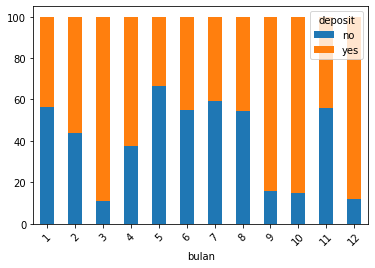

In [16]:
# melihat visualisasi jumlah customer yang mengambil/menolak deposit berdasarkan bulanb
data.plot(kind='bar',stacked=True)
plt.xticks(rotation=45)
plt.show()

dapat dilihat bahwa month tidak berlinear dengan kolom deposit, maka kolom month akan dilakukan OneHotEncoder

## 3. Modelling

## 3.1 PREPROCESSING

In [17]:
# melihat type data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7805 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7805 non-null   int64 
 1   job       7805 non-null   object
 2   balance   7805 non-null   int64 
 3   housing   7805 non-null   object
 4   loan      7805 non-null   object
 5   contact   7805 non-null   object
 6   month     7805 non-null   object
 7   campaign  7805 non-null   int64 
 8   pdays     7805 non-null   int64 
 9   poutcome  7805 non-null   object
 10  deposit   7805 non-null   object
dtypes: int64(4), object(7)
memory usage: 731.7+ KB


kolom yang belum bertipe data numerik, akan dilakukan encoding/preprosesing terlebih dahulu agar dapat masuk dalam pemodelan

In [18]:
# membuat kolom transformer
transformer=ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['job','housing','loan','contact','month','poutcome'])
],remainder = 'passthrough')

In [19]:
# memisahkan target dengan feature
x = df.drop(columns=['deposit'])
y = np.where(df['deposit']=='yes',1,0)

In [20]:
# mengecek apakah kolom transformer berhasil
#pd.DataFrame(transformer.fit_transform(x).toarray())

## 3.2 splitting data

In [21]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=2020)

## 3.3 model selection

In [22]:
# mencari model mana yang lebih baik untuk pemodelan
tree = DecisionTreeClassifier(max_depth=5,random_state=2020)
logreg = LogisticRegression(random_state=2020, max_iter = 1000)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(max_depth=5,random_state=2020)
xgb = XGBClassifier(max_depth=5,random_state=2020)

5 model yang dipilih untuk dilakukan cross validasi ialah Decision Tree, Logistic Regression, KNN, Random Forest, XGBoost. penambahan parameter random state=2020 digunakan agar hasil pengacakan yang digunakan tidak berbeda. penambahan parameter max_depth = 5 digunakan agar mengurangi potensi overfit pada seluruh model yang berbased Decision Tree. penambahan parameter max_iter = 1000 digunakan agar model logistic regression tidak mengeluarkan warning.

In [23]:
# membuat pipeline
estimator = Pipeline([
    ('preproses', transformer),
    ('model', tree)
])

In [24]:
hyperparam_space = {'model':[tree, logreg, knn, rf, xgb]}
skfold = StratifiedKFold(n_splits=5)
grid = GridSearchCV(estimator,
                   param_grid=hyperparam_space,
                    cv=skfold,
                    scoring='f1',
                    n_jobs=-1
                   )

In [25]:
grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preproses',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('model',
                                        DecisionTreeClassifier(max_depth=5,
                                                               random_state=2020))]),
             n_jobs=-1,
             param_g...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=5, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=2020, ...)]},
             scoring='f1')

In [26]:
pd.DataFrame(grid.cv_results_)[['mean_fit_time','params','mean_test_score','std_test_score','rank_test_score']]

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score
0,0.043318,"{'model': DecisionTreeClassifier(max_depth=5, random_state=2020)}",0.604085,0.027622,4
1,0.213316,"{'model': LogisticRegression(max_iter=1000, random_state=2020)}",0.653387,0.009846,2
2,0.040090,{'model': KNeighborsClassifier()},0.541159,0.015857,5
3,0.587600,"{'model': RandomForestClassifier(max_depth=5, random_state=2020)}",0.645567,0.003365,3
4,0.425048,"{'model': XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, gpu_id=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=5, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=None, num_parallel_tree=None, predictor=None, random_state=2020, ...)}",0.661890,0.014913,1


dapat dilihat bahwa model XGBoost memiliki nilai rata-rata evaluasi metrics yang terbaik, disusul dengan model Logistic Regression selain memiliki nilai evaluasi matrics yang baik, keduanya memiliki standar devisiasi yang tidak besar menandakan keduanya memiliki nilai evaluasi metrics yang stabil. maka dari itu, kedua model ini yang akan dilakukan test dengan data test.

## 3.4 model performance di datates

In [27]:
#xgboost
bestmodel = grid.best_estimator_
bestmodel.fit(x_train,y_train)
print(classification_report(y_test,bestmodel.predict(x_test)))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1019
           1       0.71      0.63      0.67       933

    accuracy                           0.70      1952
   macro avg       0.70      0.70      0.70      1952
weighted avg       0.70      0.70      0.70      1952



In [28]:
# logreg
logreg = LogisticRegression(random_state=2020, max_iter=1000)
estimator = Pipeline([
    ('preproses', transformer),
    ('model', logreg)
])
estimator.fit(x_train,y_train)
print(classification_report(y_test, estimator.predict(x_test)))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1019
           1       0.71      0.62      0.66       933

    accuracy                           0.70      1952
   macro avg       0.70      0.70      0.70      1952
weighted avg       0.70      0.70      0.70      1952



dapat dilihat bahwa keduanya memiliki nilai evaluasi metrics(f1, precision, recall) yang tidak jauh berbeda saat validasi score dan di testnya. menunjukan bahwa tidak terjadi overfitting pada kedua model ini. maka kedua model ini (xgboost dan logistic regression) yang akan dilakukan hyperparameter tunning.

## 3.5 resampling

seperti yang sudah dijelaskan sebelumnya, walaupun data masih terbilang tidak terlalu imbalance, untuk lebih memastikan sekarang kita akan akan mencoba apakah resampling diperlukan untuk data kita yang imbalance sebesar(52% dan 48%). untuk mempercepat proses, model yang diuji hanya model logreg saja.

In [29]:
# tanpa resample
logreg = LogisticRegression(random_state=2020, max_iter=1000)
model_basic = Pipeline([
    ('preproses', transformer),
    ('model', logreg)
])
model_basic.fit(x_train,y_train)
y_pred_basic = model_basic.predict(x_test)
print(classification_report(y_test, y_pred_basic))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1019
           1       0.71      0.62      0.66       933

    accuracy                           0.70      1952
   macro avg       0.70      0.70      0.70      1952
weighted avg       0.70      0.70      0.70      1952



In [30]:
# dengan resampling random over sampling
rus = RandomUnderSampler(random_state=2022)
model_rus = Pipeline([
    ('preprocess', transformer),
    ('resampling', rus),
    ('model', logreg)
])
model_rus.fit(x_train,y_train)
y_pred_rus = model_rus.predict(x_test)
print(classification_report(y_test, y_pred_rus))

              precision    recall  f1-score   support

           0       0.69      0.76      0.73      1019
           1       0.71      0.63      0.67       933

    accuracy                           0.70      1952
   macro avg       0.70      0.70      0.70      1952
weighted avg       0.70      0.70      0.70      1952



In [31]:
#dengan resampling SMOTE
smote = SMOTE(random_state = 2020)
model_smote = Pipeline([
    ('preprocess', transformer),
    ('resampling', smote),
    ('model', logreg)
])
model_smote.fit(x_train,y_train)
y_pred_smote = model_smote.predict(x_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1019
           1       0.71      0.64      0.67       933

    accuracy                           0.70      1952
   macro avg       0.71      0.70      0.70      1952
weighted avg       0.70      0.70      0.70      1952



dapat dilihat penggunaan resampling(Random Under Sampling dan Smote) tidak merubah jauh skor dari evaluasi metrics(precision, recall, f1-score), maka dari itu penggunaan resampling tidak disarankan pada data ini karena nanti hanya akan membuat data menjadi bias dan hasil dari evaluasi matrics nya tidak lebih bagus dari sebelum di resampling.

## 3.6 TUNNING

### 3.6.1 Logistic Regression

pertama kita akan melakukan hyperparameter tunning pada model ranking no.2 di cross validasi(Logistic Regression)

In [32]:
#mengecek parameter apa saja yang bisa diganti
model_basic.get_params()

{'memory': None,
 'steps': [('preproses',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(drop='first'),
                                    ['job', 'housing', 'loan', 'contact', 'month',
                                     'poutcome'])])),
  ('model', LogisticRegression(max_iter=1000, random_state=2020))],
 'verbose': False,
 'preproses': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehot', OneHotEncoder(drop='first'),
                                  ['job', 'housing', 'loan', 'contact', 'month',
                                   'poutcome'])]),
 'model': LogisticRegression(max_iter=1000, random_state=2020),
 'preproses__n_jobs': None,
 'preproses__remainder': 'passthrough',
 'preproses__sparse_threshold': 0.3,
 'preproses__transformer_weights': None,
 'preproses__transformers': [('onehot',
   OneHotEncoder(drop='first'),
   ['job', 'housing', 'loan', 'contact', 'month', 'poutcome'])],
 'pr

In [33]:
#parameter yang akan diganti
hyperparam_space={'model__C':[100,10,1,0.1,0.001],
                 'model__solver':['liblinear','newton-cg', 'lbfgs'],
                 'model__max_iter':[1000,10000]}

dapat dilihat parameter yang akan diganti ialah C(penalty), solver(model perhitungan), max iter(maximal iterasinya)

In [34]:
#melakukan gridsearch pada model logreg
grid_logreg = GridSearchCV(model_basic,
                   param_grid=hyperparam_space,
                   cv=skfold,
                   scoring='f1',
                   n_jobs=-1)

In [35]:
#grid search di fit dengan data train
grid_logreg.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preproses',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=2020))]),
             n_jobs=-1,
             param_grid={'model__C': [100, 10, 1, 0.1, 0.001],
                         'model__max_iter': [1000, 10000],
                         'model__solver': ['liblinear', 'newton-cg', 'lbfgs']},
             scoring='f1')

In [36]:
#mengeluarkan parameter terbaik dan score terbaik
grid_logreg.best_params_, grid_logreg.best_score_

({'model__C': 0.1, 'model__max_iter': 1000, 'model__solver': 'liblinear'},
 0.6606768431177723)

In [37]:
#mengetest model dengan param terbaik dengan data test
model_logreg_hyper = grid_logreg.best_estimator_
model_logreg_hyper.fit(x_train,y_train)
print(classification_report(y_test, model_logreg_hyper.predict(x_test)))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74      1019
           1       0.74      0.60      0.66       933

    accuracy                           0.71      1952
   macro avg       0.72      0.70      0.70      1952
weighted avg       0.71      0.71      0.71      1952



dapat kita lihat Logistic Regression dengan best parameter(C=0.1,max_iter=100,solver=liblinear)hanya mampu mempunyai nilai f1 score = 66%. sekarang kita akan membandingkan dengan model dengan ranking no.1 di cross validasi sesudah di tuning.

## 3.6.2 XGboost

kedua, kita akan melakukan hyperparameter tuning pada model ranking 1 di cross validasi(Xgboost)

In [38]:
#mengecek parameter apa saja yang bisa diganti
bestmodel.get_params()

{'memory': None,
 'steps': [('preproses',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(drop='first'),
                                    ['job', 'housing', 'loan', 'contact', 'month',
                                     'poutcome'])])),
  ('model',
   XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                 colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                 early_stopping_rounds=None, enable_categorical=False,
                 eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
                 grow_policy='depthwise', importance_type=None,
                 interaction_constraints='', learning_rate=0.300000012,
                 max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
                 max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
                 missing=nan, monotone_constraints='()', n_estimators=100,
                 n_jobs=0, num_

In [39]:
#parameter yang akan dicoba
hyperparam_space = [
    {'model__learning_rate' : [0.1], 'model__n_estimators':[200], 'model__max_depth':[3,4,5]}, 
    {'model__learning_rate' : [0.05], 'model__n_estimators':[400], 'model__max_depth':[3,4,5]}, 
    {'model__learning_rate' : [0.005], 'model__n_estimators':[4000], 'model__max_depth':[3,4,5]} 
]

dapat dilihat parameter yang akan dicoba diganti2 ialah learning rate(weight), n estimators(pengulangan), max depth(kedalaman pohon)

In [40]:
#gridsearch pada model xgb
xgb = XGBClassifier(max_depth=5,random_state=2020)
estimator = Pipeline([
    ('preproses', transformer),
    ('model', xgb)
])
grid_xgb = GridSearchCV(estimator,
                   param_grid=hyperparam_space,
                   cv=skfold,
                   scoring='f1',
                   n_jobs=-1)


In [41]:
#fit model denngan data train
grid_xgb.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preproses',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_byleve...
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=2020, ...))]),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.1],
                          'model__max_depth': [3, 4, 5],
                          'model__n_estimators': [200]},
                         {'model__learning_rate': [0.05],
                          'model__max_depth': [3, 4, 5],
                          'model__n_estimators': [400]},
                         {'model__learning_rate': [0.005],
                          'model__max_depth': [3, 4, 5],
                          'model__n_estimators': [4000]}],
             scoring='f1')

In [42]:
#parameter dan score terbaik
grid_xgb.best_params_, grid_xgb.best_score_

({'model__learning_rate': 0.005,
  'model__max_depth': 3,
  'model__n_estimators': 4000},
 0.6757767520233088)

In [43]:
#model dengan parameter terbaik di test dengan data test
model_xgb_hyper = grid_xgb.best_estimator_
model_xgb_hyper.fit(x_train,y_train)
print(classification_report(y_test, model_xgb_hyper.predict(x_test)))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75      1019
           1       0.76      0.61      0.68       933

    accuracy                           0.72      1952
   macro avg       0.73      0.72      0.72      1952
weighted avg       0.73      0.72      0.72      1952



### 3.7 logreg setelah dituning vs xgb setelah dituning

In [44]:
#membandingkan logreg dan xgboost setelah dituning
print('logistic regression setelah ditunnig')
model_logreg_hyper = grid_logreg.best_estimator_
model_logreg_hyper.fit(x_train,y_train)
print(classification_report(y_test, model_logreg_hyper.predict(x_test)))

print('XGBoost setelah ditunnig')
model_xgb_hyper = grid_xgb.best_estimator_
model_xgb_hyper.fit(x_train,y_train)
print(classification_report(y_test, model_xgb_hyper.predict(x_test)))

logistic regression setelah ditunnig
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      1019
           1       0.74      0.60      0.66       933

    accuracy                           0.71      1952
   macro avg       0.72      0.70      0.70      1952
weighted avg       0.71      0.71      0.71      1952

XGBoost setelah ditunnig
              precision    recall  f1-score   support

           0       0.70      0.82      0.75      1019
           1       0.76      0.61      0.68       933

    accuracy                           0.72      1952
   macro avg       0.73      0.72      0.72      1952
weighted avg       0.73      0.72      0.72      1952



dapat dilihat bahwa nilai model xgb sesudah dituning lebih besar daripada model logistic regression yang telah di tuning, maka dari itu model yang dipilih untuk model prediksi ialah model xgb setelah di tuning. perbedaan xgb sebelum di tuning dan setelah di tuning dapat dilihat sebagai berikut:

## 3.8 Xgboost sebelum dan sesudah di tunning

In [45]:
#membandingkan Xgboost sebelum dan sesudah di tunning
print('XGBoost sebelum ditunnig')
xgb = XGBClassifier(max_depth=5,random_state=2020)
xgb_model = Pipeline([
    ('preproses', transformer),
    ('model', xgb)
])
xgb_model.fit(x_train,y_train)
print(classification_report(y_test, xgb_model.predict(x_test)))

print('XGBoost setelah ditunnig')
model_xgb_hyper = grid_xgb.best_estimator_
model_xgb_hyper.fit(x_train,y_train)
print(classification_report(y_test, model_xgb_hyper.predict(x_test)))

XGBoost sebelum ditunnig
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1019
           1       0.71      0.63      0.67       933

    accuracy                           0.70      1952
   macro avg       0.70      0.70      0.70      1952
weighted avg       0.70      0.70      0.70      1952

XGBoost setelah ditunnig
              precision    recall  f1-score   support

           0       0.70      0.82      0.75      1019
           1       0.76      0.61      0.68       933

    accuracy                           0.72      1952
   macro avg       0.73      0.72      0.72      1952
weighted avg       0.73      0.72      0.72      1952



setelah di lakukan hyperparameter tunning nilai evaluasi metrics dari model mengalami kenaikan walaupun tidak naik signifikan. maka dari itu, model yang digunakan untuk menjawab business problem ialah model XGBoost yang sudah di tunning.

## 3.9 feature importances
sekarang kita akan melihat feature mana yang paling berpengaruh terhadap model prediksi kita

In [46]:
#mengeluarkan nama kolom dari kolom transformers
features = list(model_xgb_hyper[0].transformers_[0][1].get_feature_names_out()) + list(x.columns[model_xgb_hyper[0].transformers_[1][2]])

In [47]:
# nama-nama kolom di kolom transformers
features

['job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'age',
 'balance',
 'campaign',
 'pdays']

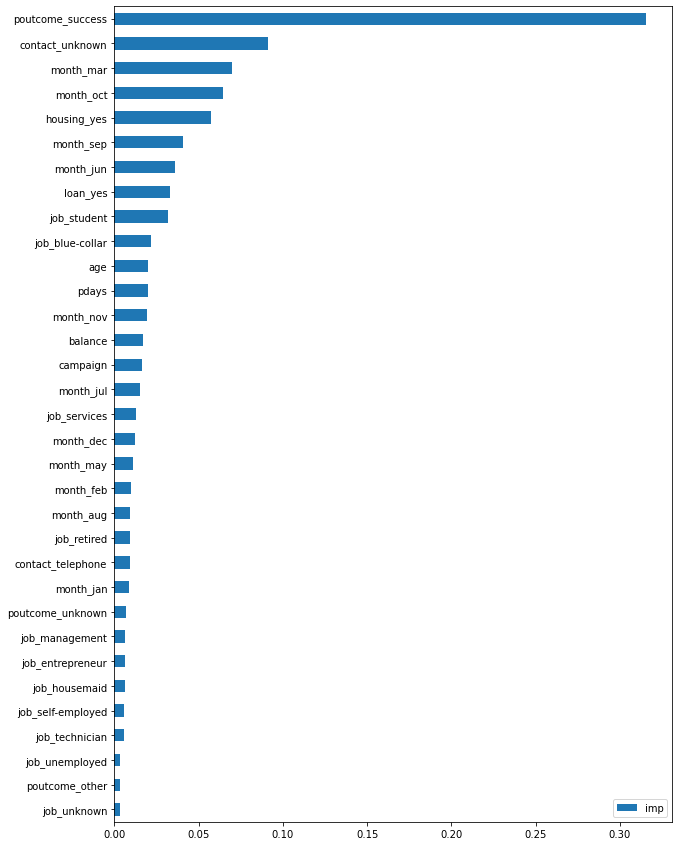

In [48]:
#visualisasi feature importances
pd.DataFrame({'imp': model_xgb_hyper[1].feature_importances_}, index=features).sort_values('imp', ascending =True).plot(kind='barh', figsize=(10,15))
plt.show()

dapat diliat features yang paling berpengaruh terhadap keputusan melakukan deposit ialah poutcame yang sukses(status keberhasilan kampanye pemasaran pada kampanye sebelumnya). salah satu keuntungan mengetahui feature importance ialah, jika running model terlalu berat salah satu opsi yang dapat dilakukan ialah menghapus feature2 yang tidak terlalu berpengaruh kepada keputusan deposit.

## 4. Conclusion

### 4.1 Model Yang Dipilih

In [49]:
# model yang dipilih menjawab business problem
model_xgb_hyper = grid_xgb.best_estimator_
model_xgb_hyper.fit(x_train,y_train)
print(classification_report(y_test, model_xgb_hyper.predict(x_test)))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75      1019
           1       0.76      0.61      0.68       933

    accuracy                           0.72      1952
   macro avg       0.73      0.72      0.72      1952
weighted avg       0.73      0.72      0.72      1952



didapatkan bahwa model yang memiliki evaluasi metrics terbaik ialah model xgboost yang telah dilakukan hyperparametertunning. xgboost sendiri ialah model yang dibuat dengan based decision tree. pada dasarnya model boosting sendiri pertama2 dia membuat pohon keputusan pertama dari data training nya terlebih dahulu. dari pohon keputusan yang pertama akan dibangun pohon keputusan kedua yang telah dilakukan koreksi pada hasil prediksinya dengan cara menambahkan bobot pada data yang salah. proses ini akan dilakukan secara terus menerus sampai jumlah yang diperintahkan. hasil prediksi dari tiap pohon keputusan pada akhirnya akan dilakukan majority voting untuk menentukan nilai final prediksi.  perbedaan xgboost dengan boosting lainnya, xgboost menambahkan beberapa proses tambahan sehingga lebih powerful. Proses tersebut adalah pemangkasan, newton boosting, dan parameter pengacakan ekstra.

### 4.2 Confussion Metrics

dari hasil evaluasi metrics model nanti bisa didapatkan confussion metrics. Confession metrics memberikan rincian hasil prediksi dan jenis kesalahan. Setiap sel dalam matriks mewakili kombinasi contoh respons yang diprediksi dan respons aktual. 

C:\Users\Raihan Fardiki\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


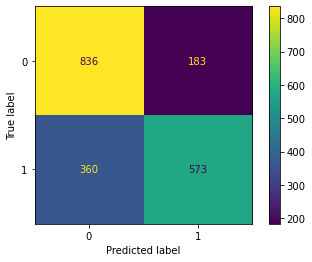

In [50]:
#mengeluarkan confussion metrics
plot_confusion_matrix(model_xgb_hyper, x_test, y_test)

## 4.3 Cost evaluation
### 4.3.1 tanpa model
dari 1952 customer, apabila tanpa model berarti perusahaan perlu membayar cost sebesar 1952 orang dikali biaya menelepon sekitar 10 menit(biaya permenit rata2 di indonesia=Rp.100/menit) dan juga telemarketing perlu menelepon 1952 orang yang memakan 19520 menit atau 325,3 jam. rata-rata keuntungan yang bisa didapat dari satu orang yang melakukan deposito sekitar Rp. 10.000, maka perusahaan bank dapat memperoleh keuntungan dari 933 orang yang melakukan deposit sebesar 9.330.000. jadi di total kita dapat keuntungan sekitar Rp. 7.378.000.<br>

Perhitungan : 
* ongkos biaya menelepon = 1952x100x10 = Rp. 1.952.000
* waktu yang dihabiskan = 1952 x 10 = 19520 menit atau 325,3 jam
* pendapatan dari customer yang berdeposit = 933 x Rp. 10.000 = Rp. 9.330.000
* total pendapatan = Rp. 9.330.000 - Rp. 1.952.000 = Rp. 7.378.000 
* memakan waktu sebanyak 325,3 jam


### 4.3.2 dengan model
apabila kita menggunakan model kita hanya perlu menelepon 756 customer yang di prediksi akan melakukan deposit dikali waktu biaya menelepon kurang lebih 10 menit per satu customernya. maka kita perlu menyediakan cost untuk menelepon sebanyak Rp.756.000 dan telemarketing perlu menghabiskan waktu sekitar 7560 menit / 126 jam. dari 769 customer yang ditelepon 580 customernya melakukan deposit. jika perusahaan dapat meraup keuntungan kurang lebih 10.000 dari tiap customer yang melakukan deposit, maka perusahaan dapat meraup pendapatan kotor sebesar 5.730.000. jika dikurang dengan cost menelepon perusahaan dapat memperoleh keuntungan sebesar Rp. 4.974.000, tapi perusahaan/bagian telemarketing hanya perlu menghabiskan waktu sebanyak 7560 menit/ 126 jam. waktu yang di safe hampir 3x lipat dengan waktu yang harus dihabiskan dengan tanpa penerapan model. waktu yang di safe dapat digunakan untuk menelepon customer lain yang berpotensi melakukan deposit, jadi kurang lebih perusahaan dapat bekerja 3x lebih cepat dengan adanya model. maka perusahaan kurang lebih dapat mendapatkan keuntungan sebanyak Rp. 14.922.000.<br>

perhitungan:
* ongkos biaya  = 756x100x10= Rp. 756.000
* waktu yang dihabiskan = 756x10 = 7560 menit atau 126 jam
* pendapatan dari customer yang berdeposit = 573x10.000=5.730.000
* total pendapatan = Rp. 5.730.000 - Rp. 756.000 = Rp. 4.974.000
* dengan waktu yang sama dengan tanpa model dapat menghasilkan = 3 x 4.974.000 = Rp. 14.922.000.

### 4.3.3  Conclussion 
apabila kita kembali ke business problem sebelumnya, kita menginginkan suatu model yang dapat menjawab problem business kita di awal yaitu model yang dapat mengurangi cost pemasaran dan juga bisa menambah profitabilitas perusahaan. maka dibandingkanlah tanpa penggunaan model dengan penggunaan model seperti berikut:<br>
tanpa menggunakan model perusahaan dapat memperoleh keuntungan kurang lebih Rp 7.378.000 dengan menghabiskan waktu 325,3 jam. sedangkan apabila menggunakan model yang ditawarkan, perusahaan dapat meraup keuntungan Rp. 4.974.000 hanya dalam waktu 126 jam. walaupun terlihat keuntungan dari tanpa penggunaan model lebih banyak, tetapi bisnis tanpa model menghabiskan waktu hampir 3x lebih lama. waktu yang disafe dari penerapan model dapat kita gunakan untuk menelepon customer yang berpotensi mengambil kampanye pemasaran lainnya, maka bila kita asumsikan dengan waktu yang sama dengan tanpa penerapan model, perusahaan dapat mendapat keuntungan kurang lebih 3x lebih besar dari asumsi pendapatan dengan model yaitu sekitar Rp. 14.922.000.<br>

**kesimpulan: seperti yang sudah diuraikan di atas, maka penggunaan model dapat disimpulkan dapat menjawab business problem perusahaan kita**


## 5. Recomenndation

beberapa rekomendasi yang dapat dilakukan:
* menambahkan beberapa fitur yang mungkin berpengaruh terhadap target seperti: jumlah penghasilan, jumlah keluarga yang ditanggung, lama bekerja, dll.
* menambah model selain 5 model diatas di validasi cross
* membuat model lebih komplek
* melakukan ab testing dengan model yang telah dibuat

## save model

In [51]:
#fit model dengan seluruh data
save_model = grid_xgb.best_estimator_
save_model.fit(x,y)

Pipeline(steps=[('preproses',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categor...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.005,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=3, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=4000, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=2020, ...))])

In [52]:
# save model
pickle.dump(save_model,open('model_picle.sav','wb'))